In [1]:
import pandas as pd
import numpy as np
import warnings as wr
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

wr.filterwarnings("ignore")

In [2]:
loc_lbl = r"D:\Documentos\Facu\Organizacion de Datos\TP2\Labels"
loc_ftr = r"D:\Documentos\Facu\Organizacion de Datos\TP2\Features\FeaturesLocalST"

label_trn = pd.read_csv( loc_lbl + "\\label_auc_21_23.csv" )
label_tst = pd.read_csv( loc_lbl + "\\label_auc_24_26.csv" )

X = label_trn[ ["ref_hash"] ]; Z = label_tst[ ["ref_hash"] ]
Y = label_trn[ ["ref_hash","21_23_st"] ]; W = label_tst[ ["ref_hash","24_26_st"] ] 


# <span style="color:orange">  Preparo los datos para predecir </span>
Con los datos 21-23 predecimos "24-26_sc"

In [3]:
Z_var = Z; W_var = W

### Agregamos los features 

In [4]:
ftr_01_Z = pd.read_csv( loc_ftr + "\\auc_aftr_tst.csv" ); Z_var = Z_var.merge( ftr_01_Z, how = "inner", on = "ref_hash" )
ftr_02_Z = pd.read_csv( loc_ftr + "\\auc_mday_tst.csv" ); Z_var = Z_var.merge( ftr_02_Z, how = "inner", on = "ref_hash" )
ftr_03_Z = pd.read_csv( loc_ftr + "\\auc_morn_tst.csv" ); Z_var = Z_var.merge( ftr_03_Z, how = "inner", on = "ref_hash" )
ftr_04_Z = pd.read_csv( loc_ftr + "\\auc_nght_tst.csv" ); Z_var = Z_var.merge( ftr_04_Z, how = "inner", on = "ref_hash" )
ftr_05_Z = pd.read_csv( loc_ftr + "\\cant_auc_tst.csv" ); Z_var = Z_var.merge( ftr_05_Z, how = "inner", on = "ref_hash" )
ftr_06_Z = pd.read_csv( loc_ftr + "\\cant_clk_tst.csv" ); Z_var = Z_var.merge( ftr_06_Z, how = "inner", on = "ref_hash" )
ftr_07_Z = pd.read_csv( loc_ftr + "\\cant_evt_tst.csv" ); Z_var = Z_var.merge( ftr_07_Z, how = "inner", on = "ref_hash" )
ftr_08_Z = pd.read_csv( loc_ftr + "\\cevt_atr_tst.csv" ); Z_var = Z_var.merge( ftr_08_Z, how = "inner", on = "ref_hash" )
ftr_09_Z = pd.read_csv( loc_ftr + "\\cins_atr_tst.csv" ); Z_var = Z_var.merge( ftr_09_Z, how = "inner", on = "ref_hash" )
ftr_10_Z = pd.read_csv( loc_ftr + "\\cins_imp_tst.csv" ); Z_var = Z_var.merge( ftr_10_Z, how = "inner", on = "ref_hash" )
ftr_11_Z = pd.read_csv( loc_ftr + "\\clk_aftr_tst.csv" ); Z_var = Z_var.merge( ftr_11_Z, how = "inner", on = "ref_hash" )
ftr_12_Z = pd.read_csv( loc_ftr + "\\clk_mday_tst.csv" ); Z_var = Z_var.merge( ftr_12_Z, how = "inner", on = "ref_hash" )
ftr_13_Z = pd.read_csv( loc_ftr + "\\clk_morn_tst.csv" ); Z_var = Z_var.merge( ftr_13_Z, how = "inner", on = "ref_hash" )
ftr_14_Z = pd.read_csv( loc_ftr + "\\clk_ngth_tst.csv" ); Z_var = Z_var.merge( ftr_14_Z, how = "inner", on = "ref_hash" )
ftr_15_Z = pd.read_csv( loc_ftr + "\\event_id_tst.csv" ); Z_var = Z_var.merge( ftr_15_Z, how = "inner", on = "ref_hash" )
ftr_16_Z = pd.read_csv( loc_ftr + "\\evt_aftr_tst.csv" ); Z_var = Z_var.merge( ftr_16_Z, how = "inner", on = "ref_hash" )
ftr_17_Z = pd.read_csv( loc_ftr + "\\evt_mday_tst.csv" ); Z_var = Z_var.merge( ftr_17_Z, how = "inner", on = "ref_hash" )
ftr_18_Z = pd.read_csv( loc_ftr + "\\evt_morn_tst.csv" ); Z_var = Z_var.merge( ftr_18_Z, how = "inner", on = "ref_hash" )
ftr_19_Z = pd.read_csv( loc_ftr + "\\evt_nght_tst.csv" ); Z_var = Z_var.merge( ftr_19_Z, how = "inner", on = "ref_hash" )
ftr_20_Z = pd.read_csv( loc_ftr + "\\frst_auc_tst.csv" ); Z_var = Z_var.merge( ftr_20_Z, how = "inner", on = "ref_hash" ) 
ftr_21_Z = pd.read_csv( loc_ftr + "\\frst_clk_tst.csv" ); Z_var = Z_var.merge( ftr_21_Z, how = "inner", on = "ref_hash" ) 
ftr_22_Z = pd.read_csv( loc_ftr + "\\frst_evt_tst.csv" ); Z_var = Z_var.merge( ftr_22_Z, how = "inner", on = "ref_hash" ) 
ftr_23_Z = pd.read_csv( loc_ftr + "\\frst_ins_tst.csv" ); Z_var = Z_var.merge( ftr_23_Z, how = "inner", on = "ref_hash" ) 
ftr_24_Z = pd.read_csv( loc_ftr + "\\hora_auc_tst.csv" ); Z_var = Z_var.merge( ftr_24_Z, how = "inner", on = "ref_hash" ) 
ftr_25_Z = pd.read_csv( loc_ftr + "\\hr_f_evt_tst.csv" ); Z_var = Z_var.merge( ftr_25_Z, how = "inner", on = "ref_hash" ) 
ftr_26_Z = pd.read_csv( loc_ftr + "\\ins_afme_tst.csv" ); Z_var = Z_var.merge( ftr_26_Z, how = "inner", on = "ref_hash" ) 
ftr_27_Z = pd.read_csv( loc_ftr + "\\ins_mdoh_tst.csv" ); Z_var = Z_var.merge( ftr_27_Z, how = "inner", on = "ref_hash" ) 
ftr_28_Z = pd.read_csv( loc_ftr + "\\ins_mroh_tst.csv" ); Z_var = Z_var.merge( ftr_28_Z, how = "inner", on = "ref_hash" ) 
ftr_29_Z = pd.read_csv( loc_ftr + "\\ins_ngoh_tst.csv" ); Z_var = Z_var.merge( ftr_29_Z, how = "inner", on = "ref_hash" ) 
ftr_30_Z = pd.read_csv( loc_ftr + "\\kind_evt_tst.csv" ); Z_var = Z_var.merge( ftr_30_Z, how = "inner", on = "ref_hash" ) 
ftr_31_Z = pd.read_csv( loc_ftr + "\\last_auc_tst.csv" ); Z_var = Z_var.merge( ftr_31_Z, how = "inner", on = "ref_hash" ) 
ftr_32_Z = pd.read_csv( loc_ftr + "\\last_evt_tst.csv" ); Z_var = Z_var.merge( ftr_32_Z, how = "inner", on = "ref_hash" ) 
ftr_33_Z = pd.read_csv( loc_ftr + "\\last_ins_tst.csv" ); Z_var = Z_var.merge( ftr_33_Z, how = "inner", on = "ref_hash" ) 
ftr_34_Z = pd.read_csv( loc_ftr + "\\m1oh_auc_tst.csv" ); Z_var = Z_var.merge( ftr_34_Z, how = "inner", on = "ref_hash" ) 
ftr_35_Z = pd.read_csv( loc_ftr + "\\main_ahr_tst.csv" ); Z_var = Z_var.merge( ftr_35_Z, how = "inner", on = "ref_hash" ) 
ftr_36_Z = pd.read_csv( loc_ftr + "\\main_ehr_tst.csv" ); Z_var = Z_var.merge( ftr_36_Z, how = "inner", on = "ref_hash" ) 
ftr_37_Z = pd.read_csv( loc_ftr + "\\ref_type_tst.csv" ); Z_var = Z_var.merge( ftr_37_Z, how = "inner", on = "ref_hash" ) 
ftr_38_Z = pd.read_csv( loc_ftr + "\\rh_encod_tst.csv" ); Z_var = Z_var.merge( ftr_38_Z, how = "inner", on = "ref_hash" ) 
ftr_39_Z = pd.read_csv( loc_ftr + "\\sdia_auc_tst.csv" ); Z_var = Z_var.merge( ftr_39_Z, how = "inner", on = "ref_hash" ) 
ftr_40_Z = pd.read_csv( loc_ftr + "\\srce_auc_tst.csv" ); Z_var = Z_var.merge( ftr_40_Z, how = "inner", on = "ref_hash" ) 
ftr_41_Z = pd.read_csv( loc_ftr + "\\wifi_evt_tst.csv" ); Z_var = Z_var.merge( ftr_41_Z, how = "inner", on = "ref_hash" ) 

# <span style="color:orange">  Preparo los datos para entrenar </span>

Con los datos 18-20 + "21-23_sc" entrenamos

In [5]:
Y_var = Y; X_var = X

### Agregamos los features

In [6]:
ftr_01_X = pd.read_csv( loc_ftr + "\\auc_aftr_trn.csv" ); X_var = X_var.merge( ftr_01_X, how = "inner", on = "ref_hash" ) 
ftr_02_X = pd.read_csv( loc_ftr + "\\auc_mday_trn.csv" ); X_var = X_var.merge( ftr_02_X, how = "inner", on = "ref_hash" ) 
ftr_03_X = pd.read_csv( loc_ftr + "\\auc_morn_trn.csv" ); X_var = X_var.merge( ftr_03_X, how = "inner", on = "ref_hash" ) 
ftr_04_X = pd.read_csv( loc_ftr + "\\auc_nght_trn.csv" ); X_var = X_var.merge( ftr_04_X, how = "inner", on = "ref_hash" ) 
ftr_05_X = pd.read_csv( loc_ftr + "\\cant_auc_trn.csv" ); X_var = X_var.merge( ftr_05_X, how = "inner", on = "ref_hash" ) 
ftr_06_X = pd.read_csv( loc_ftr + "\\cant_clk_trn.csv" ); X_var = X_var.merge( ftr_06_X, how = "inner", on = "ref_hash" ) 
ftr_07_X = pd.read_csv( loc_ftr + "\\cant_evt_trn.csv" ); X_var = X_var.merge( ftr_07_X, how = "inner", on = "ref_hash" ) 
ftr_08_X = pd.read_csv( loc_ftr + "\\cevt_atr_trn.csv" ); X_var = X_var.merge( ftr_08_X, how = "inner", on = "ref_hash" ) 
ftr_09_X = pd.read_csv( loc_ftr + "\\cins_atr_trn.csv" ); X_var = X_var.merge( ftr_09_X, how = "inner", on = "ref_hash" ) 
ftr_10_X = pd.read_csv( loc_ftr + "\\cins_imp_trn.csv" ); X_var = X_var.merge( ftr_10_X, how = "inner", on = "ref_hash" ) 
ftr_11_X = pd.read_csv( loc_ftr + "\\clk_aftr_trn.csv" ); X_var = X_var.merge( ftr_11_X, how = "inner", on = "ref_hash" ) 
ftr_12_X = pd.read_csv( loc_ftr + "\\clk_mday_trn.csv" ); X_var = X_var.merge( ftr_12_X, how = "inner", on = "ref_hash" ) 
ftr_13_X = pd.read_csv( loc_ftr + "\\clk_morn_trn.csv" ); X_var = X_var.merge( ftr_13_X, how = "inner", on = "ref_hash" ) 
ftr_14_X = pd.read_csv( loc_ftr + "\\clk_ngth_trn.csv" ); X_var = X_var.merge( ftr_14_X, how = "inner", on = "ref_hash" ) 
ftr_15_X = pd.read_csv( loc_ftr + "\\event_id_trn.csv" ); X_var = X_var.merge( ftr_15_X, how = "inner", on = "ref_hash" ) 
ftr_16_X = pd.read_csv( loc_ftr + "\\evt_aftr_trn.csv" ); X_var = X_var.merge( ftr_16_X, how = "inner", on = "ref_hash" ) 
ftr_17_X = pd.read_csv( loc_ftr + "\\evt_mday_trn.csv" ); X_var = X_var.merge( ftr_17_X, how = "inner", on = "ref_hash" ) 
ftr_18_X = pd.read_csv( loc_ftr + "\\evt_morn_trn.csv" ); X_var = X_var.merge( ftr_18_X, how = "inner", on = "ref_hash" ) 
ftr_19_X = pd.read_csv( loc_ftr + "\\evt_nght_trn.csv" ); X_var = X_var.merge( ftr_19_X, how = "inner", on = "ref_hash" ) 
ftr_20_X = pd.read_csv( loc_ftr + "\\frst_auc_trn.csv" ); X_var = X_var.merge( ftr_20_X, how = "inner", on = "ref_hash" ) 
ftr_21_X = pd.read_csv( loc_ftr + "\\frst_clk_trn.csv" ); X_var = X_var.merge( ftr_21_X, how = "inner", on = "ref_hash" ) 
ftr_22_X = pd.read_csv( loc_ftr + "\\frst_evt_trn.csv" ); X_var = X_var.merge( ftr_22_X, how = "inner", on = "ref_hash" ) 
ftr_23_X = pd.read_csv( loc_ftr + "\\frst_ins_trn.csv" ); X_var = X_var.merge( ftr_23_X, how = "inner", on = "ref_hash" ) 
ftr_24_X = pd.read_csv( loc_ftr + "\\hora_auc_trn.csv" ); X_var = X_var.merge( ftr_24_X, how = "inner", on = "ref_hash" ) 
ftr_25_X = pd.read_csv( loc_ftr + "\\hr_f_evt_trn.csv" ); X_var = X_var.merge( ftr_25_X, how = "inner", on = "ref_hash" ) 
ftr_26_X = pd.read_csv( loc_ftr + "\\ins_afme_trn.csv" ); X_var = X_var.merge( ftr_26_X, how = "inner", on = "ref_hash" ) 
ftr_27_X = pd.read_csv( loc_ftr + "\\ins_mdoh_trn.csv" ); X_var = X_var.merge( ftr_27_X, how = "inner", on = "ref_hash" ) 
ftr_28_X = pd.read_csv( loc_ftr + "\\ins_mroh_trn.csv" ); X_var = X_var.merge( ftr_28_X, how = "inner", on = "ref_hash" ) 
ftr_29_X = pd.read_csv( loc_ftr + "\\ins_ngoh_trn.csv" ); X_var = X_var.merge( ftr_29_X, how = "inner", on = "ref_hash" ) 
ftr_30_X = pd.read_csv( loc_ftr + "\\kind_evt_trn.csv" ); X_var = X_var.merge( ftr_30_X, how = "inner", on = "ref_hash" ) 
ftr_31_X = pd.read_csv( loc_ftr + "\\last_auc_trn.csv" ); X_var = X_var.merge( ftr_31_X, how = "inner", on = "ref_hash" ) 
ftr_32_X = pd.read_csv( loc_ftr + "\\last_evt_trn.csv" ); X_var = X_var.merge( ftr_32_X, how = "inner", on = "ref_hash" ) 
ftr_33_X = pd.read_csv( loc_ftr + "\\last_ins_trn.csv" ); X_var = X_var.merge( ftr_33_X, how = "inner", on = "ref_hash" ) 
ftr_34_X = pd.read_csv( loc_ftr + "\\m1oh_auc_trn.csv" ); X_var = X_var.merge( ftr_34_X, how = "inner", on = "ref_hash" ) 
ftr_35_X = pd.read_csv( loc_ftr + "\\main_ahr_trn.csv" ); X_var = X_var.merge( ftr_35_X, how = "inner", on = "ref_hash" ) 
ftr_36_X = pd.read_csv( loc_ftr + "\\main_ehr_trn.csv" ); X_var = X_var.merge( ftr_36_X, how = "inner", on = "ref_hash" ) 
ftr_37_X = pd.read_csv( loc_ftr + "\\ref_type_trn.csv" ); X_var = X_var.merge( ftr_37_X, how = "inner", on = "ref_hash" ) 
ftr_38_X = pd.read_csv( loc_ftr + "\\rh_encod_trn.csv" ); X_var = X_var.merge( ftr_38_X, how = "inner", on = "ref_hash" ) 
ftr_39_X = pd.read_csv( loc_ftr + "\\sdia_auc_trn.csv" ); X_var = X_var.merge( ftr_39_X, how = "inner", on = "ref_hash" ) 
ftr_40_X = pd.read_csv( loc_ftr + "\\srce_auc_trn.csv" ); X_var = X_var.merge( ftr_40_X, how = "inner", on = "ref_hash" ) 
ftr_41_X = pd.read_csv( loc_ftr + "\\wifi_evt_trn.csv" ); X_var = X_var.merge( ftr_41_X, how = "inner", on = "ref_hash" ) 

In [7]:
X_var = X_var.merge( Y_var, how = "inner", on = "ref_hash" ); 
Z_var = Z_var.merge( W_var, how = "inner", on = "ref_hash" ); 

Y_var = X_var[ ["21_23_st"] ]; X_var = X_var.drop( ["ref_hash", "21_23_st"], axis = 1 )
W_var = Z_var[ ["24_26_st"] ]; Z_var = Z_var.drop( ["ref_hash", "24_26_st"], axis = 1 )

In [8]:
for column in X_var.columns:
    X_var[column] = X_var[column].fillna((X_var[column].mean()))

for column in Z_var.columns:
    Z_var[column] = Z_var[column].fillna((Z_var[column].mean()))

# Prediccion con <span style="color:green"> *Random Forest*</span> 

In [9]:
prm = {"max_depth":4, "random_state":50, "n_estimators":250, "oob_score":True, "criterion":'mse'}

estimator = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3, max_leaf_nodes=None,
           min_impurity_decrease=0.1, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.1, n_estimators=200, n_jobs=None,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [10]:
fit = estimator.fit( X_var,Y_var )

In [11]:
prd = estimator.predict( Z_var )

### Calculamos el RMSE

In [12]:
rmse = np.sqrt( mean_squared_error(W_var, prd) )
print("RMSE: %f" % (rmse) )

RMSE: 89565.754948


In [ ]:
RMSE: 72762.380589


### Probamos features

In [ ]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

thresholds = sort(fit.feature_importances_)
i = 0; pred = []; mod_sel = [];
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(fit, threshold=thresh, prefit=True)
    select_X = selection.transform(X_var)
    # train model
    selection_model = xgb.XGBRegressor( **prm )
    mod_sel.append( selection_model.fit(select_X, Y_var) )
    # eval model
    select_Z = selection.transform(Z_var)
    pred.append( selection_model.predict(select_Z) )
    rmse = np.sqrt( mean_squared_error(pred[i], W_var) )
    print("Thresh=%.3f, n=%d, RMSE:%f, model=%d" % (thresh, select_X.shape[1], rmse, i) )
    i = i + 1

## Tunning de HyperParameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error, make_scorer
#greater_is_better = False -> Transformar score_function en loss_function
mse = make_scorer( mean_squared_error, greater_is_better = False )

reg = RandomForestRegressor()

tune_prms = {'max_depth': [1,2,3,4],
             'n_estimators': [80,120,200,250],
             'random_state': [0,10,50]
            }

grid = RandomizedSearchCV( estimator = estimator, param_distributions = tune_prms, cv = 10, n_jobs = 1, scoring = mse, n_iter = 20 ) 
grid.fit(X.fillna(0),Y.fillna(0))    

# Results from Grid Search
print("==========================================================")
print("||            Results from Grid Search                  ||")
print("==========================================================")    
    
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

## Ploteamos el Feature Importance

Feature ranking:


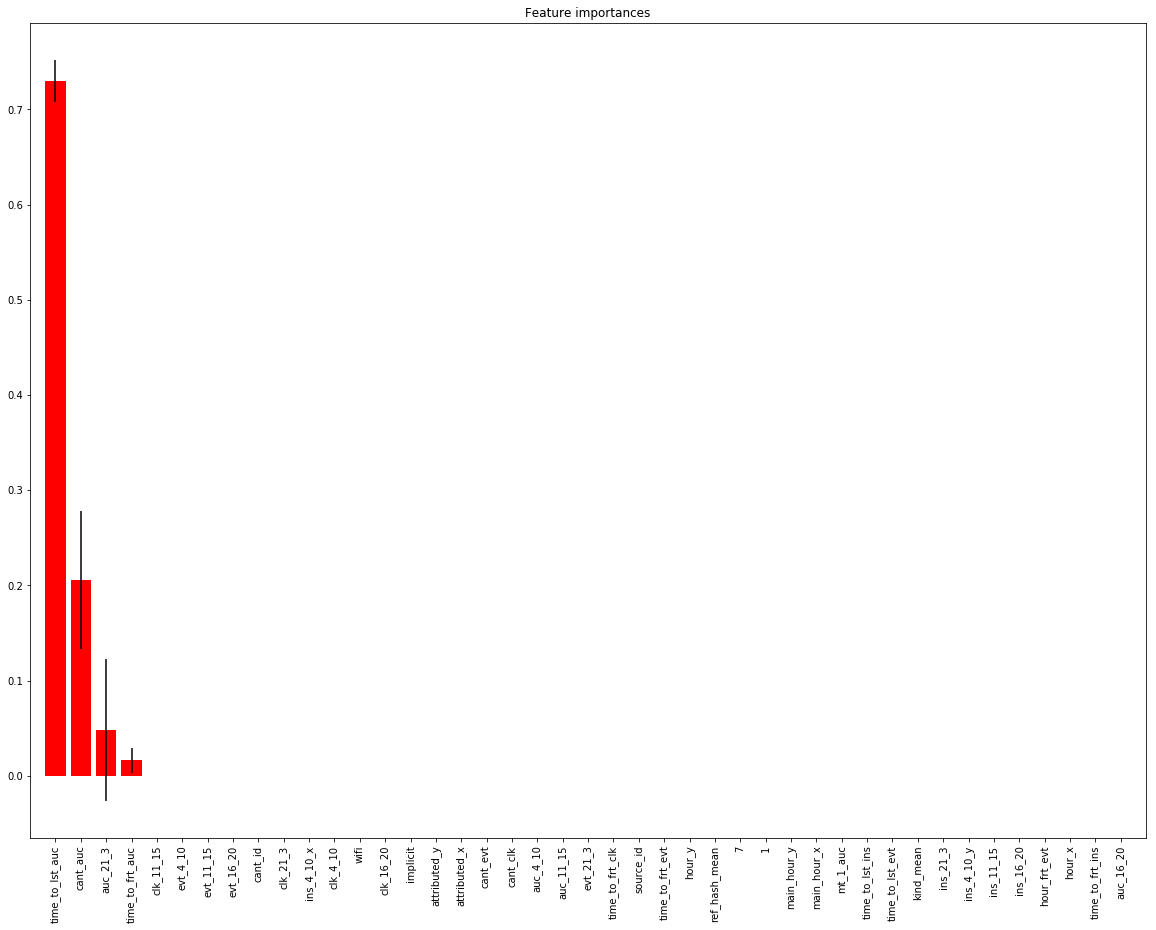

In [15]:
import matplotlib.pyplot as plt
forest = estimator

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features = X_var.columns
# Print the feature ranking
print("Feature ranking:")

#for f in range(X_var.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20, 15))
plt.title("Feature importances")
plt.bar(range(X_var.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_var.shape[1]), [features[i] for i in indices],rotation='vertical')
plt.xlim([-1, X_var.shape[1]])
plt.show()